# International Crisis Behavior Events (ICBe) Dataset

## Types of Events Stored in the ICBe Dataset

The dataset captures **high-stakes, international-level crises** that involve multiple countries or major actors. Common types of events included are:

1. **Military Confrontations**: Armed conflicts between states, skirmishes, and border conflicts action. *Examples*: Korean War, Cuban Missile Crisis.

2. **Political Crises**: Severe diplomatic standoffs, confrontations, or disputes involving governments. *Examples*: Political standoffs or diplomatic breakups, such as those between the U.S. and the Soviet Union during the Cold War.

3. **Intervention Crises**: Crises where external states or organizations intervene in domestic conflicts or disputes. *Examples*: NATO intervention in Kosovo, UN peacekeeping involvement in civil wars.

4. **Territorial Disputes**: Conflicts over territorial claims, such as border disputes or sovereignty issues. *Examples*: Kashmir conflict, South China Sea territorial disputes.

##### Types of Events NOT Stored in the ICBe Dataset

The ICBe dataset excludes crises that are either **non-international in scope** or **do not pose a significant threat to international stability**. Here are some categories not included, that can be extended later:

1. **Financial or Economic Crises**: Purely economic events, such as stock market crashes, debt crises, or financial collapses. *Examples*: The Great Depression, 2008 Financial Crisis, Asian Financial Crisis.

2. **Natural Disasters**: Natural calamities that may have international relief efforts but do not involve interstate conflict. *Examples*: Earthquakes, tsunamis, hurricanes.

3. **Domestic Political Crises** (without international impact): Internal political events without direct international confrontation. *Examples*: Domestic protests, coups, or government shutdowns that do not escalate internationally.

4. **Health and Environmental Crises**: Health-related emergencies, like pandemics, or environmental disasters with no immediate international political conflict. *Examples*: COVID-19 pandemic, Chernobyl disaster, oil spills.

5. **Subnational or Civil Conflicts** (without international intervention): Internal civil wars or insurgencies that lack significant international involvement. *Examples*: Non-intervention civil wars, ethnic conflicts limited to one country.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pyreadr
import re  


from IPython.display import display, HTML
from collections import Counter


#### Loading dataset

- **`ICBe_V1.1_events_agreed.Rds`**: Contains detailed event-level data with coder consensus, used for analyzing specific agreed-upon events within crises.
- **`ICBe_V1.1_crises_markdown.Rds`**: Provides crisis-level summaries in markdown format, useful for generating readable crisis overviews and reports.


In [2]:
full_data_path = '../../Data/ICBe/ICBe_V1.1_events_agreed.Rds'
result_1 = pyreadr.read_r(full_data_path)

wide_path = '../../Data/ICBe/ICBe_V1.1_crises_markdown.Rds'
result_2 = pyreadr.read_r(wide_path)

print("Keys in the .Rds files:", list(result_1.keys()), ",", list(result_2.keys()))

Keys in the .Rds files: [None] , [None]


In [3]:
# First dataset containing detailed event-level data 
df_full = result_1[None]

# Provides summaries in markdow format
df_wide = result_2[None]

In [171]:
df_full.head()

,crisno,crisis_text,sentence_number_int_aligned,sentence_span_text,do_actor_a,do_actor_b,think_actor_a,say_actor_a,say_actor_b,date_earliest_decade,...,condition_interact_escalate,condition_interact_decreasecoop,condition_interact_domains,condition_interact_fatalities,condition_interact_units,condition_interact_forces,act_deescalate,condition_act_deescalate,condition_act_escalate,condition_act_uncooperative
0,1.0,RUSSIAN CIVIL WAR I,1,"Bolshevik Russia, precursor to the Soviet Union",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,RUSSIAN CIVIL WAR I,2,"The Communist regime, which had attained power...",Russian Soviet Federative Socialist Republic,NaN,NaN,NaN,NaN,1910,...,,,,,,,,,,
2,1.0,RUSSIAN CIVIL WAR I,2,"The Communist regime, which had attained power...",Russian Soviet Federative Socialist Republic,Germany,NaN,NaN,NaN,1910,...,,,,,,,,,,
3,1.0,RUSSIAN CIVIL WAR I,3,The Western Allies were anxious to maintain an...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,RUSSIAN CIVIL WAR I,4,In pursuit of these goals the Allies attempted...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_wide.head()

,crisno,crisis_text,n_sentence_number_int_aligned,n_events,yrtrig,yrterm,coders_expert,coders_novice,act,actors,units_domains,forces_fatalities
0,1.0,RUSSIAN CIVIL WAR I,12,7,1918.0,1920.0,3,3,battle/clash;withdraw from area,![](/home/tlscherer/Desktop/ICBEdataset/replic...,![](/home/tlscherer/Desktop/ICBEdataset/replic...,NaN
1,2.0,COSTA RICAN COUP,20,24,1918.0,1919.0,2,1,annex;assert political control over;attack;cea...,![](/home/tlscherer/Desktop/ICBEdataset/replic...,![](/home/tlscherer/Desktop/ICBEdataset/replic...,![](/home/tlscherer/Desktop/ICBEdataset/replic...
2,3.0,RUSSIAN CIVIL WAR II,9,8,1918.0,1919.0,2,3,battle/clash;border violation;coup;deployment ...,![](/home/tlscherer/Desktop/ICBEdataset/replic...,![](/home/tlscherer/Desktop/ICBEdataset/replic...,NaN
3,4.0,BALTIC INDEPENDENCE,33,45,1918.0,1920.0,2,3,annex;assert autonomy against;assert political...,![](/home/tlscherer/Desktop/ICBEdataset/replic...,![](/home/tlscherer/Desktop/ICBEdataset/replic...,NaN
4,5.0,TESCHEN,22,35,1919.0,1920.0,2,2,annex;battle/clash;break off negotiations;depl...,![](/home/tlscherer/Desktop/ICBEdataset/replic...,![](/home/tlscherer/Desktop/ICBEdataset/replic...,NaN


We need to clean the wide dataset and enrich it with additional information from the first dataset, including details such as actors involved, the number of fatalities, event types, and more.

### Cleaning fatalities informations

In [5]:
from word2number import w2n

print(df_full['interact_fatalities'].value_counts())

df_full_ = df_full.copy()

df_full_['interact_fatalities'] = df_full_['interact_fatalities'].str.replace(
    r'\bindividuals?\b', '', case=False, regex=True).str.replace(';', '', regex=False).str.strip()

df_full_ = df_full_[df_full_['interact_fatalities'].str.lower() != 'none']
print(" Remaining unique values for fatalities:", df_full_['interact_fatalities'].value_counts())

interact_fatalities
                         13266
none                      1641
individuals                 90
tens                        73
hundreds                    43
thousands                   26
tens of thousands           16
hundreds of thousands        8
individuals;tens             5
individuals;none             2
hundreds;individuals         1
Name: count, dtype: int64
 Remaining unique values for fatalities: interact_fatalities
                         13356
tens                        78
hundreds                    44
thousands                   26
tens of thousands           16
hundreds of thousands        8
Name: count, dtype: int64


Converting fatalities into numbers

In [6]:
fatalities_mapping = {
    'tens': 10,
    'hundreds': 100,
    'thousands': 1000,
    'tens of thousands': 10000,
    'hundreds of thousands': 100000
}

def convert_fatalities(value):
    if pd.isna(value):
        return 0
    try:
        if value.isdigit():
            return int(value)
        value = value.lower().strip()
        return fatalities_mapping.get(value, 0) 
    except Exception as e:
        print(f"Error converting value '{value}': {e}")
        return 0  

df_full_['interact_fatalities'] = df_full_['interact_fatalities'].apply(convert_fatalities)
df_full_['interact_fatalities'].value_counts()


interact_fatalities
0         16968
10           78
100          44
1000         26
10000        16
100000        8
Name: count, dtype: int64

We aggregate rows for the same event (`crisno`) to create a single entry per event:

1. **Actors (`do_actor_a`, `do_actor_b`)**: Combine unique actors across rows into one string.
2. **Event Types (`event_type`)**: Merge unique event types into a single string.
3. **Fatalities (`interact_fatalities`)**: Sum fatalities across rows.

A new column `actors_involved` consolidates all actors, and redundant columns (`do_actor_a`, `do_actor_b`) are dropped. This results in one clean row per event.


In [7]:
columns_of_interest = [
    'crisno', 'do_actor_a', 'do_actor_b', 'event_type', 'interact_fatalities' ]

df_filtered = df_full_[columns_of_interest]

aggregation_rules = {
    'do_actor_a': lambda x: ', '.join(set(x.dropna())),  
    'do_actor_b': lambda x: ', '.join(set(x.dropna())),  
    'event_type': lambda x: ', '.join(set(x.dropna())),  
    'interact_fatalities': 'sum'  
}

df_aggregated = df_filtered.groupby('crisno').agg(aggregation_rules).reset_index()
df_aggregated['actors_involved'] = df_aggregated['do_actor_a'] + ', ' + df_aggregated['do_actor_b']
df_aggregated = df_aggregated.drop(columns=['do_actor_a', 'do_actor_b'])
df_aggregated.head()


,crisno,event_type,interact_fatalities,actors_involved
0,1.0,"action, thought",0,"Czechoslovakia, Canada;France;Japan;United Kin..."
1,2.0,"speech, action, thought",0,"Costa Rica, Nicaragua, Honduras;Nicaragua, Hon..."
2,3.0,"action, thought",0,"Russian Soviet Federative Socialist Republic, ..."
3,4.0,"speech, action, thought",0,"Estonia;United Kingdom, Germany;Latvia, Estoni..."
4,5.0,"speech, action, thought",0,"Czechoslovakia, France;United Kingdom, Czechos..."


In [8]:
def clean_actors(actors):
    if pd.isna(actors):
        return None  
    # Split by both ',' and ';', remove duplicates, and standardize formatting
    unique_actors = set(actor.strip() for actor in re.split('[,;]', actors) if actor.strip())
    return ', '.join(sorted(unique_actors))  

df_aggregated['actors_involved'] = df_aggregated['actors_involved'].apply(clean_actors)
df_aggregated.head()


,crisno,event_type,interact_fatalities,actors_involved
0,1.0,"action, thought",0,"Canada, Czechoslovakia, France, Germany, Japan..."
1,2.0,"speech, action, thought",0,"Costa Rica, Guatemala, Honduras, Nicaragua, Un..."
2,3.0,"action, thought",0,"Canada, France, Russian Soviet Federative Soci..."
3,4.0,"speech, action, thought",0,"Estonia, Finland, Germany, Latvia, Lithuania, ..."
4,5.0,"speech, action, thought",0,"Allies, Czechoslovakia, France, Poland, United..."


#### Cleaning unwanted columns from the wide dataset

In [9]:
columns_to_drop = [
    'n_sentence_number_int_aligned',
    'n_events',
    'coders_expert',
    'coders_novice',
    'act',
    'actors',
    'units_domains',
    'forces_fatalities'
]

df_wide = df_wide.drop(columns=columns_to_drop, errors='ignore')
df_wide.head()

,crisno,crisis_text,yrtrig,yrterm
0,1.0,RUSSIAN CIVIL WAR I,1918.0,1920.0
1,2.0,COSTA RICAN COUP,1918.0,1919.0
2,3.0,RUSSIAN CIVIL WAR II,1918.0,1919.0
3,4.0,BALTIC INDEPENDENCE,1918.0,1920.0
4,5.0,TESCHEN,1919.0,1920.0


In [10]:
df_wide = df_wide.merge(df_aggregated, on='crisno', how='left')
df_wide.head()

,crisno,crisis_text,yrtrig,yrterm,event_type,interact_fatalities,actors_involved
0,1.0,RUSSIAN CIVIL WAR I,1918.0,1920.0,"action, thought",0,"Canada, Czechoslovakia, France, Germany, Japan..."
1,2.0,COSTA RICAN COUP,1918.0,1919.0,"speech, action, thought",0,"Costa Rica, Guatemala, Honduras, Nicaragua, Un..."
2,3.0,RUSSIAN CIVIL WAR II,1918.0,1919.0,"action, thought",0,"Canada, France, Russian Soviet Federative Soci..."
3,4.0,BALTIC INDEPENDENCE,1918.0,1920.0,"speech, action, thought",0,"Estonia, Finland, Germany, Latvia, Lithuania, ..."
4,5.0,TESCHEN,1919.0,1920.0,"speech, action, thought",0,"Allies, Czechoslovakia, France, Poland, United..."


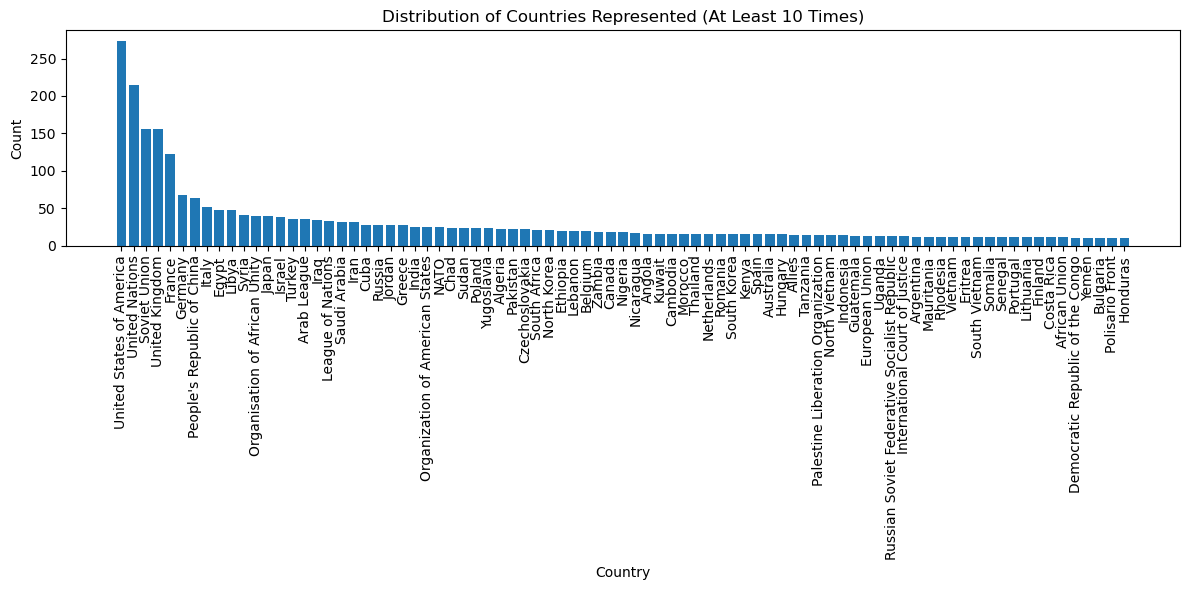

In [11]:
country_list = df_wide['actors_involved'].dropna().str.split(', ').sum()
country_counts = Counter(country_list)

# Filter countries that appear at least 10 times
filtered_countries = {country: count for country, count in country_counts.items() if count >= 10}

countries_filtered = pd.DataFrame(filtered_countries.items(), columns=['Country', 'Count']).sort_values(by='Count', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(countries_filtered['Country'], countries_filtered['Count'])
plt.xticks(rotation=90)
plt.title('Distribution of Countries Represented (At Least 10 Times)')
plt.xlabel('Country')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [13]:
file_path = "../data/ICBe_dataset_processed.csv"
df_wide.to_csv(file_path, index=False)

print(f"Dataset successfully saved to {file_path}")

Dataset successfully saved to ../data/ICBe_dataset_processed.csv


#### Exploration with the movie dataset

In [153]:
DATA_FOLDER = '../../src/data/'
MOVIE_DATASET = DATA_FOLDER + 'movies_dataset_final.tsv'

movies = pd.read_csv(MOVIE_DATASET, sep='\t')

In [154]:
movies['Movie countries'].value_counts()

Movie countries
United States of America                                             9465
India                                                                2370
United Kingdom                                                       1040
Japan                                                                 556
United States of America, United Kingdom                              442
                                                                     ... 
France, Spain, United States of America                                 1
France, West Germany, Cameroon, Germany                                 1
United States of America, Japan, Israel                                 1
France, Portugal                                                        1
Kingdom of Great Britain, Japan, England, United Kingdom, Germany       1
Name: count, Length: 944, dtype: int64

In [155]:
# Preprocess the country columns in both datasets
def preprocess_countries(column):
    return column.str.split(', ').apply(lambda x: set(x) if isinstance(x, list) else set())


movies['Movie countries'] = preprocess_countries(movies['Movie countries'])
df_wide['actors_involved'] = preprocess_countries(df_wide['actors_involved'])

def count_matching_events(movie_countries, event_actors):
    return sum(1 for actors in event_actors if movie_countries & actors)

movies['matching_events_count'] = movies['Movie countries'].apply(
    lambda movie_countries: count_matching_events(movie_countries, df_wide['actors_involved'])
)



In [156]:
movies_with_no_matches = movies[movies['matching_events_count'] == 0]
print(movies_with_no_matches['Movie countries'].value_counts())


Movie countries
{Hong Kong}                   251
{China, Hong Kong}             70
{China}                        57
{Ireland}                      12
{Republic of Macedonia}         3
{Nepal}                         3
{England}                       3
{Puerto Rico}                   3
{Burma}                         2
{Bahamas}                       1
{Kingdom of Great Britain}      1
{Guinea-Bissau}                 1
{Hong Kong, Nepal}              1
{Malayalam Language}            1
{Weimar Republic}               1
Name: count, dtype: int64


For the moment, we don't take into account the exact time when the movie was released compared to when the event took place, but as we can see there are only few movies with any related events taking place in their country. Lets correct the fact that China is mentionned as 'People's Republic of China'

In [161]:
df_wide['actors_involved'] = df_wide['actors_involved'].apply(
    lambda actors: {actor.replace("People's Republic of China", "China") for actor in actors}
    if isinstance(actors, set) else set())


movies['matching_events_count'] = movies['Movie countries'].apply(
    lambda movie_countries: count_matching_events(movie_countries, df_wide['actors_involved'])
)

In [162]:
movies_with_no_matches = movies[movies['matching_events_count'] == 0]
print(movies_with_no_matches['Movie countries'].value_counts())

Movie countries
{Hong Kong}                   251
{Ireland}                      12
{Republic of Macedonia}         3
{Nepal}                         3
{England}                       3
{Puerto Rico}                   3
{Burma}                         2
{Bahamas}                       1
{Kingdom of Great Britain}      1
{Guinea-Bissau}                 1
{Hong Kong, Nepal}              1
{Malayalam Language}            1
{Weimar Republic}               1
Name: count, dtype: int64


In [163]:
def event_has_no_match(event_actors, movie_countries_list):
    return all(len(event_actors & movie_countries) == 0 for movie_countries in movie_countries_list)

unmatched_events = df_wide[df_wide['actors_involved'].apply(
    lambda event_actors: event_has_no_match(event_actors, movies['Movie countries'])
)]

print("Number of events that don't have any corresponding movies:",  len(unmatched_events))
unmatched_events

Number of events that don't have any corresponding movies: 12


,crisno,crisis_text,yrtrig,yrterm,event_type,interact_fatalities,actors_involved
155,156.0,MOCORON INCIDENT,1957.0,1957.0,"action, thought, speech",0,"{Nicaragua, Organization of American States, H..."
178,179.0,ETHIOPIA-SOMALIA,1960.0,1961.0,"action, thought, speech",0,"{Ethiopia, Somalia}"
197,198.0,DOMINICAN REPUBLIC-HAITI II,1963.0,1963.0,"action, thought, speech",0,"{United Nations, Dominican Republic, Haiti, Or..."
204,205.0,BURUNDI-RWANDA,1963.0,1964.0,"action;thought, thought, action, speech",10,"{Rwanda, Tutsi, Burundi, Organisation of Afric..."
244,245.0,TANZANIA-UGANDA I,1971.0,1971.0,"action, thought, speech",0,"{Uganda, Tanzania}"
246,247.0,TANZANIA-UGANDA II,1972.0,1972.0,"action, thought, speech",0,"{Somalia, Uganda, Organisation of African Unit..."
267,268.0,NOUAKCHOTT I,1976.0,1976.0,"action, thought",100,"{Polisario Front, Mauritania}"
277,278.0,MAPAI SEIZURE,1977.0,1977.0,"action, thought, speech",0,"{United Nations, Mozambique, Rhodesia}"
372,373.0,TODGHERE INCIDENT,1987.0,1987.0,"action, thought, speech",20,"{Somalia, Somali National Movement, Ethiopia, ..."
388,389.0,CONTRAS IV,1989.0,1989.0,"action, thought, speech",10,"{El Salvador, Honduras, Nicaragua, Costa Rica,..."


Manual inspection could be needed before dropping these events. 

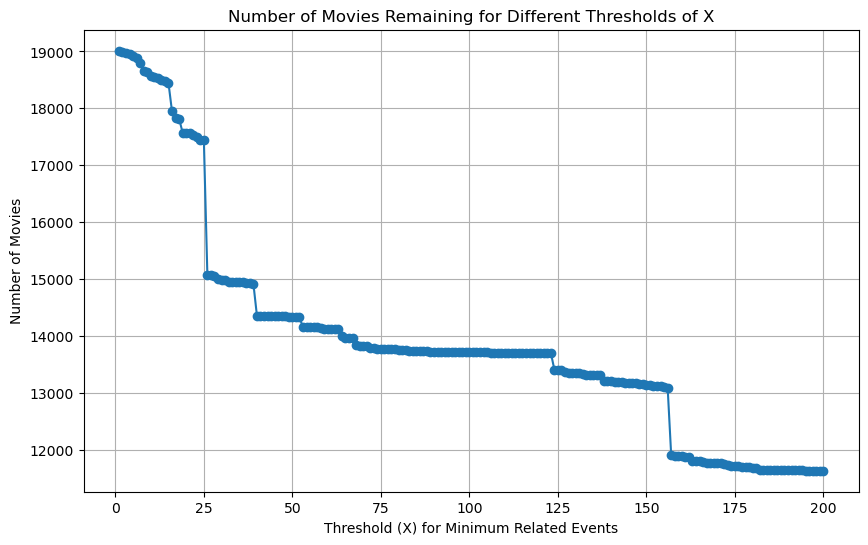

In [164]:
# Filter movies where the number of related events is greater than or equal to x

x_values = range(1, 201)  # Define x from 1 to 200
movie_counts = []

# Calculate the number of movies for each x
for x in x_values:
    count = movies[movies['matching_events_count'] >= x].shape[0]
    movie_counts.append(count)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x_values, movie_counts, marker='o', linestyle='-')
plt.title('Number of Movies Remaining for Different Thresholds of X')
plt.xlabel('Threshold (X) for Minimum Related Events')
plt.ylabel('Number of Movies')
plt.grid()
plt.show()

### Future Ideas

We can explore the correlation between movies and events using several approaches:

1. **Global Temporal Correlation**:
   - Investigate if there is an overall correlation between the happy endings of movies and global conflicts or wars.
   - Account for production delays by shifting the timelines of movies and events by `x` years to identify where the strongest correlation lies. Possibly 'x' could be determined using a mean production time or finding precise data for the production of eahc movie.
   - This will require to perform temporal analysis by clustering events and movies into defined time periods (e.g., decades).

2. **Geographic Analysis**:
   - Cluster data by geographic regions (e.g., continents) to isolate events specific to these regions and explore regional correlations.
   - Create smaller clusters by individual countries to examine if specific nations exhibit a stronger correlation between events and movie outcomes. See if they are disproportionately affected by specific events and whether this is reflected in the movies associated with them.

3. **Movies Featuring Similar Themes to Historical Events**:
   - Explore if movies with themes matching historical events (e.g., war, diplomacy) have endings that correlate with the outcomes or type of the historical event.
   - **Key Variables**:
     - **ICBe**:
       - `event_type`: Identifies the type of crisis (e.g., action, speech (diplomatic), ... ) to match with movie themes. 
     - **Movies**:
       - `genre` or `theme`: To match movie themes with event types.
       - `release_date` and `score`: To analyze if the ending sentiment aligns with crisis outcomes.

5. **Impact of Crisis Severity on Movie Endings**:
   - Investigate if movies made during or after crises with high fatalities are more likely to have darker endings.
   - **Key Variables**:
     - **ICBe**:
       - `interact_fatalities`: To measure the severity of crises in terms of human cost. The data probably need to be amplified since there are several missing values for this particular column. 
     - **Movies**:
       - `release_year`: To filter for movies made during or after high-fatality crises.
       - `ending_sentiment_score`: To analyze if severe crises correlate with darker movie endings.


